$R^2$ für ein polynomielles Modell

In [74]:
import numpy as np
import pandas as pd
# plotting settings
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm.notebook import tqdm

In [75]:
melbourne_file_path = 'data/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)
melbourne_data = melbourne_data.dropna(axis=0)  # entfernen von Daten mit fehlenden Werten
melbourne_data.columns  # Spaltennamen der Tabelle (potentielle Features)


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [83]:
#features = ['BuildingArea', Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude', 'YearBuilt', 'Distance']
features = ['Rooms', 'BuildingArea', 'Lattitude']
data = melbourne_data[features + ['Price']]
data = data.assign(price_per_area = melbourne_data['Price'] / melbourne_data["Landsize"])
data.describe()
data.head()

/home/plex/.pyenv/versions/ki/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Rooms  BuildingArea  Lattitude      Price  price_per_area
1      2          79.0   -37.8079  1035000.0     6634.615385
2      3         150.0   -37.8093  1465000.0    10932.835821
4      4         142.0   -37.8072  1600000.0    13333.333333
6      3         210.0   -37.8024  1876000.0     7657.142857
7      2         107.0   -37.8060  1636000.0     6390.625000

In [77]:
def h(x, w):
    """x und w sind numpy arrays; x kann auch die komplette Feature-Matrix sein"""
    # Diese Form erlaubt es für x eine ganze (Feature-)Matrix zu übergeben. Die Matrix enthält
    # zeilenweise je einen Datenpunkt, für den h berechnet werden soll.
    # w @ x.T ist dann ein Vektor mit je einem Ergebnis in den Komponenten des Vektors pro Zeile
    # der übergebenen (Feature-)Matrix.
    return x @ w


In [78]:
# Definition der Kostenfunktion
def J(w, X, y):
    """
    w, X, y müssen numpy arrays sein
    X: Feature-Matrix aller Trainingsdaten inkl. Spalte mit 1; Dimension: n x (d+1)
    y: Vektor aller Targets zu X
    """
    errors = y - h(x=X, w=w)
    mse = 1.0/(2.0*len(y)) * ( errors @ errors )
    return mse


In [79]:
def feature_matrix_from_data(data):
    # hier erzeugen wir die Matrix mit unseren Input-Daten (Features) inklusive der Spalte mit "1"
    return np.hstack((np.ones((len(data),1)), data.to_numpy(copy=True)))


In [80]:
# hier erzeugen wir die Matrix mit unseren Input-Daten (Features) inklusive der Spalte mit "1"
#X = np.hstack((np.ones((len(data),1)), data[features].to_numpy(copy=True)))
X = feature_matrix_from_data(data[features])
# und ausserdem den Vektor der Targets
y = data.Price.to_numpy(copy=True)


In [81]:
%%time
w_ana = np.linalg.solve(X.T @ X, X.T @ y)
print('Die {} Parameter der linearen Regression:\n{}'.format(len(w_ana), w_ana))
J_ana = J(w=w_ana, X=X, y=y)
print('Kostenfunktion J(w_ana): {}'.format(J_ana))


Die 4 Parameter der linearen Regression:
[-6.97461781e+07  2.41559504e+05  2.31456611e+03 -1.84562537e+06]
Kostenfunktion J(w_ana): 137899453867.5851
CPU times: user 495 μs, sys: 39 μs, total: 534 μs
Wall time: 553 μs


1     6634.615385
2    10932.835821
4    13333.333333
6     7657.142857
7     6390.625000
Name: price_per_area, dtype: float64


<Axes: xlabel='BuildingArea', ylabel='Price'>

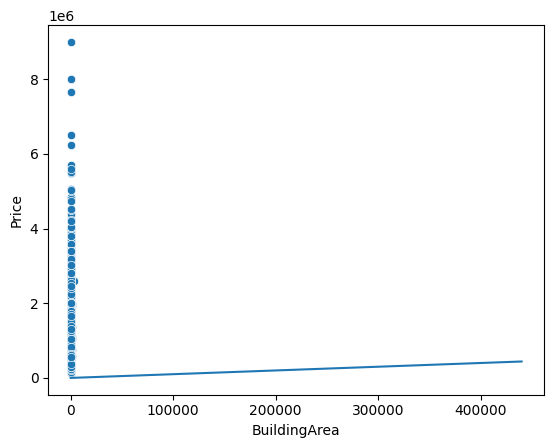

In [91]:
ax = sns.scatterplot(x=data['BuildingArea'], y=data['Price'])

xplot = data['price_per_area']
yplot = data['price_per_area'][0:len(xplot)]
print(yplot.head())
sns.lineplot(x=xplot, y=yplot, ax=ax)


In [85]:
data['price_per_area'].head()

1     6634.615385
2    10932.835821
4    13333.333333
6     7657.142857
7     6390.625000
Name: price_per_area, dtype: float64